## Алгоритмы анализа данных
## Урок 1. Линейная регрессия
## Домашка
## Потемкин Сергей

In [88]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

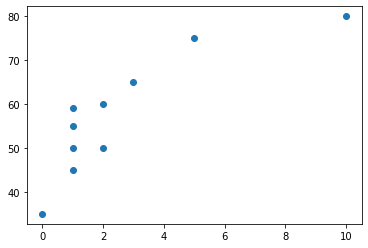

In [89]:
plt.scatter(X[1,:], y)

In [90]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

## 1. Подберите скорость обучения (alpha) и количество итераций:

In [91]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

### 1.1. код вычисления коэффициентов поместим в функцию, чтобы потом искать оптимальное количество итераций
### 1.2. при этом цикл for заменим на цикл while. условием выхода из цикла будет если разница предыдущей и текущей ошибки меньше 1е-8. Таким образом найдем КОЛИЧЕСТВО ИТЕРАЦИЙ

In [92]:
n = X.shape[1]
# alpha = 1e-4
# W = np.array([1, 0.5])
# W, alpha

def regr(alpha):
    W = np.array([1, 0.5])
    i, err_old, err_min = 0, np.inf, 1e-8
    while True:
        i += 1
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))

    #   print(i, W, err, err_alpha)
        err_alpha = err_old - err

        if (err_alpha < err_min):
            
            break

        err_old = err
    return i, W, err, err_alpha
                

### 1.3 Скорость обучения будем искать подбором. Для начала попробуем шаг 0,001

In [93]:
alpha = np.arange(.01, .09, .001)
for i in alpha:
    print(i, regr(i))

0.01 (1031, array([47.23122165,  3.91088439]), 45.937500465870315, 9.841286896516976e-09)
0.011 (941, array([47.23126529,  3.91087633]), 45.937500423666116, 9.860279703843844e-09)
0.011999999999999999 (866, array([47.23130691,  3.91086865]), 45.93750038524528, 9.7966719181386e-09)
0.012999999999999998 (802, array([47.23134074,  3.9108624 ]), 45.93750035544381, 9.807550327423087e-09)
0.013999999999999997 (747, array([47.23137162,  3.9108567 ]), 45.9375003292953, 9.80052305976642e-09)
0.014999999999999996 (699, array([47.23139745,  3.91085193]), 45.937500308258244, 9.845358306392882e-09)
0.015999999999999993 (657, array([47.23142244,  3.91084732]), 45.937500288543866, 9.845756210324907e-09)
0.016999999999999994 (620, array([47.23144735,  3.91084272]), 45.93750026950436, 9.78636194304272e-09)
0.017999999999999995 (587, array([47.23147002,  3.91083853]), 45.937500252760955, 9.733774675169116e-09)
0.018999999999999993 (557, array([47.23148578,  3.91083562]), 45.93750024156419, 9.83509096386

### Из полученных результатов берем интервал от 0,62 до 0,65 с шагом 0,0001 

In [94]:
alpha = np.arange(.062, .065, .0001)

for i in alpha:
    print(i, regr(i))

0.062 (177, array([47.23181024,  3.91077571]), 45.937500067956854, 9.688314150935184e-09)
0.0621 (177, array([47.23181672,  3.91077451]), 45.937500065349404, 9.333199102457002e-09)
0.062200000000000005 (177, array([47.23182308,  3.91077334]), 45.93750006284173, 8.991015931769653e-09)
0.06230000000000001 (176, array([47.23180759,  3.91077619]), 45.93750006909137, 9.902720421450795e-09)
0.06240000000000001 (176, array([47.23181409,  3.91077499]), 45.937500066454305, 9.541679446556373e-09)
0.06250000000000001 (176, array([47.23182046,  3.91077381]), 45.937500063917625, 9.193684036290506e-09)
0.06260000000000002 (176, array([47.23182671,  3.91077266]), 45.93750006147749, 8.858378919285315e-09)
0.06270000000000002 (175, array([47.23181122,  3.91077555]), 45.93750006766546, 9.767234132596059e-09)
0.06280000000000002 (175, array([47.23181762,  3.91077438]), 45.937500065096195, 9.412921997409285e-09)
0.06290000000000003 (175, array([47.23182389,  3.91077325]), 45.93750006262427, 9.071449369457

Получаем, что $alpha$ = 0.0639 за $174$ шага дойдем до минимума с заданной точностью $10^{-8}$.

## *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [95]:
alpha = 0.0639
W = np.array([1, 0.5])

### Ошибка в том что если мы убираем цикл, то нужно перемнажать матрицы, а не суммировать произведение

In [96]:
for i in range(201):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    
    # ТУТ ОШИБКА !!!
#     W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    W = np.linalg.inv(X @ X.T) @ X @ y
    
    if i % 10 == 0:
        print(i, W, err)

0 [47.23214286  3.91071429] 3173.15
10 [47.23214286  3.91071429] 45.93749999999999
20 [47.23214286  3.91071429] 45.93749999999999
30 [47.23214286  3.91071429] 45.93749999999999
40 [47.23214286  3.91071429] 45.93749999999999
50 [47.23214286  3.91071429] 45.93749999999999
60 [47.23214286  3.91071429] 45.93749999999999
70 [47.23214286  3.91071429] 45.93749999999999
80 [47.23214286  3.91071429] 45.93749999999999
90 [47.23214286  3.91071429] 45.93749999999999
100 [47.23214286  3.91071429] 45.93749999999999
110 [47.23214286  3.91071429] 45.93749999999999
120 [47.23214286  3.91071429] 45.93749999999999
130 [47.23214286  3.91071429] 45.93749999999999
140 [47.23214286  3.91071429] 45.93749999999999
150 [47.23214286  3.91071429] 45.93749999999999
160 [47.23214286  3.91071429] 45.93749999999999
170 [47.23214286  3.91071429] 45.93749999999999
180 [47.23214286  3.91071429] 45.93749999999999
190 [47.23214286  3.91071429] 45.93749999999999
200 [47.23214286  3.91071429] 45.93749999999999


## Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

<span style="color:red">выполнено в задании 1</span>

### проверяем при помощи sklearn

In [99]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X.T, y)
y_pred = slr.predict(X.T)
print('w_1: {}'.format(slr.intercept_))
print('w_0: {}'.format(slr.coef_[1]))


w_1: 47.23214285714286
w_0: 3.9107142857142843
